### Car Dekho: Used Car Price Prediction Using Regression Analysis

In [259]:
# IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [260]:
# IMPORTING DATASET

df_car = pd.read_csv("C:/Users/Aditya Saxena/Downloads/archive (7)/cardekho_dataset.csv")

In [261]:
df_car

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [262]:
# Dropping Unnecesary "Unnamed" Column

df_car.drop(['Unnamed: 0'],axis=1,inplace=True)

In [263]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [264]:
df_car.describe(include='number')

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [265]:
df_car.describe(include='object')

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [266]:
# Checking for missing values

df_car.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [267]:
# Checking for duplicated values

df_car.duplicated().sum()



np.int64(167)

In [268]:
df_car[df_car.duplicated(keep=False)]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
25,Maruti Swift Dzire,Maruti,Swift Dzire,6,90000,Individual,Diesel,Manual,26.59,1248,74.00,5,600000
67,Honda City,Honda,City,8,70000,Individual,Petrol,Manual,16.80,1497,116.30,5,545000
159,Maruti Alto,Maruti,Alto,2,25000,Individual,Petrol,Manual,24.70,796,47.30,5,310000
197,Honda City,Honda,City,8,70000,Individual,Petrol,Manual,16.80,1497,116.30,5,545000
214,Renault KWID,Renault,KWID,4,35000,Individual,Petrol,Automatic,24.04,999,67.00,5,350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15229,Maruti Swift,Maruti,Swift,8,80000,Individual,Diesel,Manual,22.90,1248,74.00,5,350000
15324,Maruti Wagon R,Maruti,Wagon R,6,50000,Individual,CNG,Manual,26.60,998,58.16,5,450000
15367,Tata Tiago,Tata,Tiago,4,30000,Individual,Petrol,Manual,23.84,1199,84.00,5,350000
15378,Hyundai Grand,Hyundai,Grand,6,30000,Individual,Petrol,Manual,18.90,1197,82.00,5,450000


In [269]:
# Dropping duplicated values

df_car.drop_duplicates(keep='first', inplace=True)


### Exploratory Data Analysis

#### Frequency Distribution of Categorical Variables

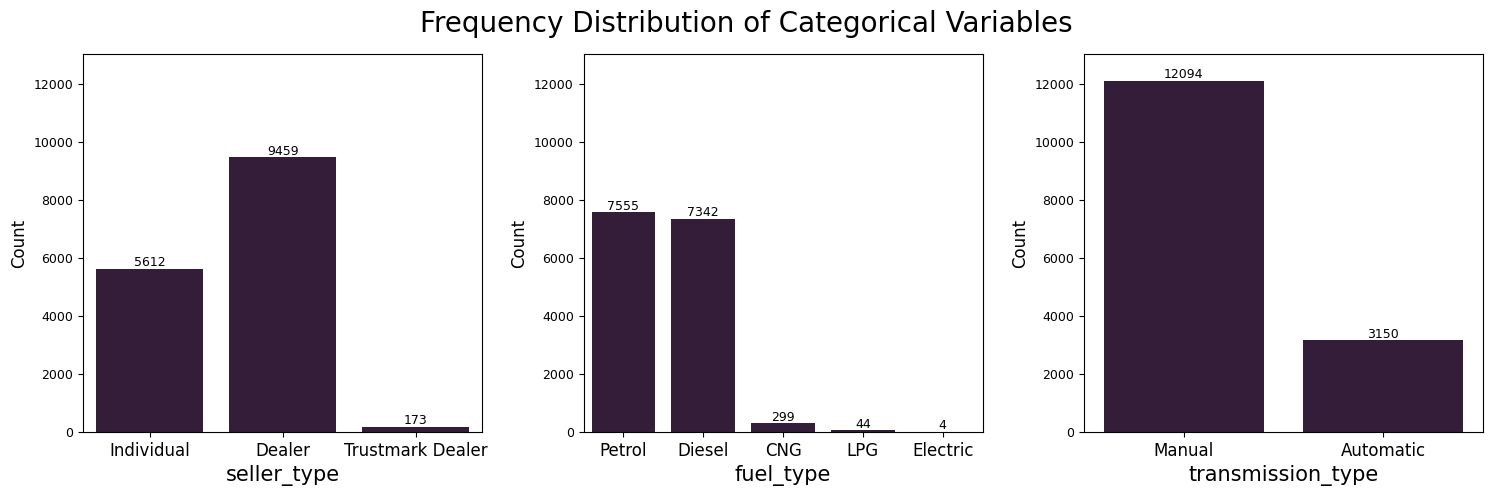

In [270]:
CatCols = ["seller_type","fuel_type","transmission_type"]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=100)

CustomPalette = sns.set_palette("rocket")
       
for i in range(len(CatCols)):
    graph = sns.countplot(x=CatCols[i], data=df_car, ax=ax[i])
    ax[i].set_xlabel(CatCols[i], fontsize=15)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_ylim([0,13000])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12)
    for cont in graph.containers:
        graph.bar_label(cont)

plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20) 
plt.tight_layout()
plt.show()

INSIGHTS:

>Most used cars are sold by Dealers, followed by Individuals, with Trustmark Dealers making up a very small share.

>Petrol and Diesel dominate the used car market, while CNG, LPG, and Electric vehicles are rare.

>The majority of used cars listed are Manual, with Automatic cars being significantly fewer.


#### Frequency Distribution of Numerical Variables

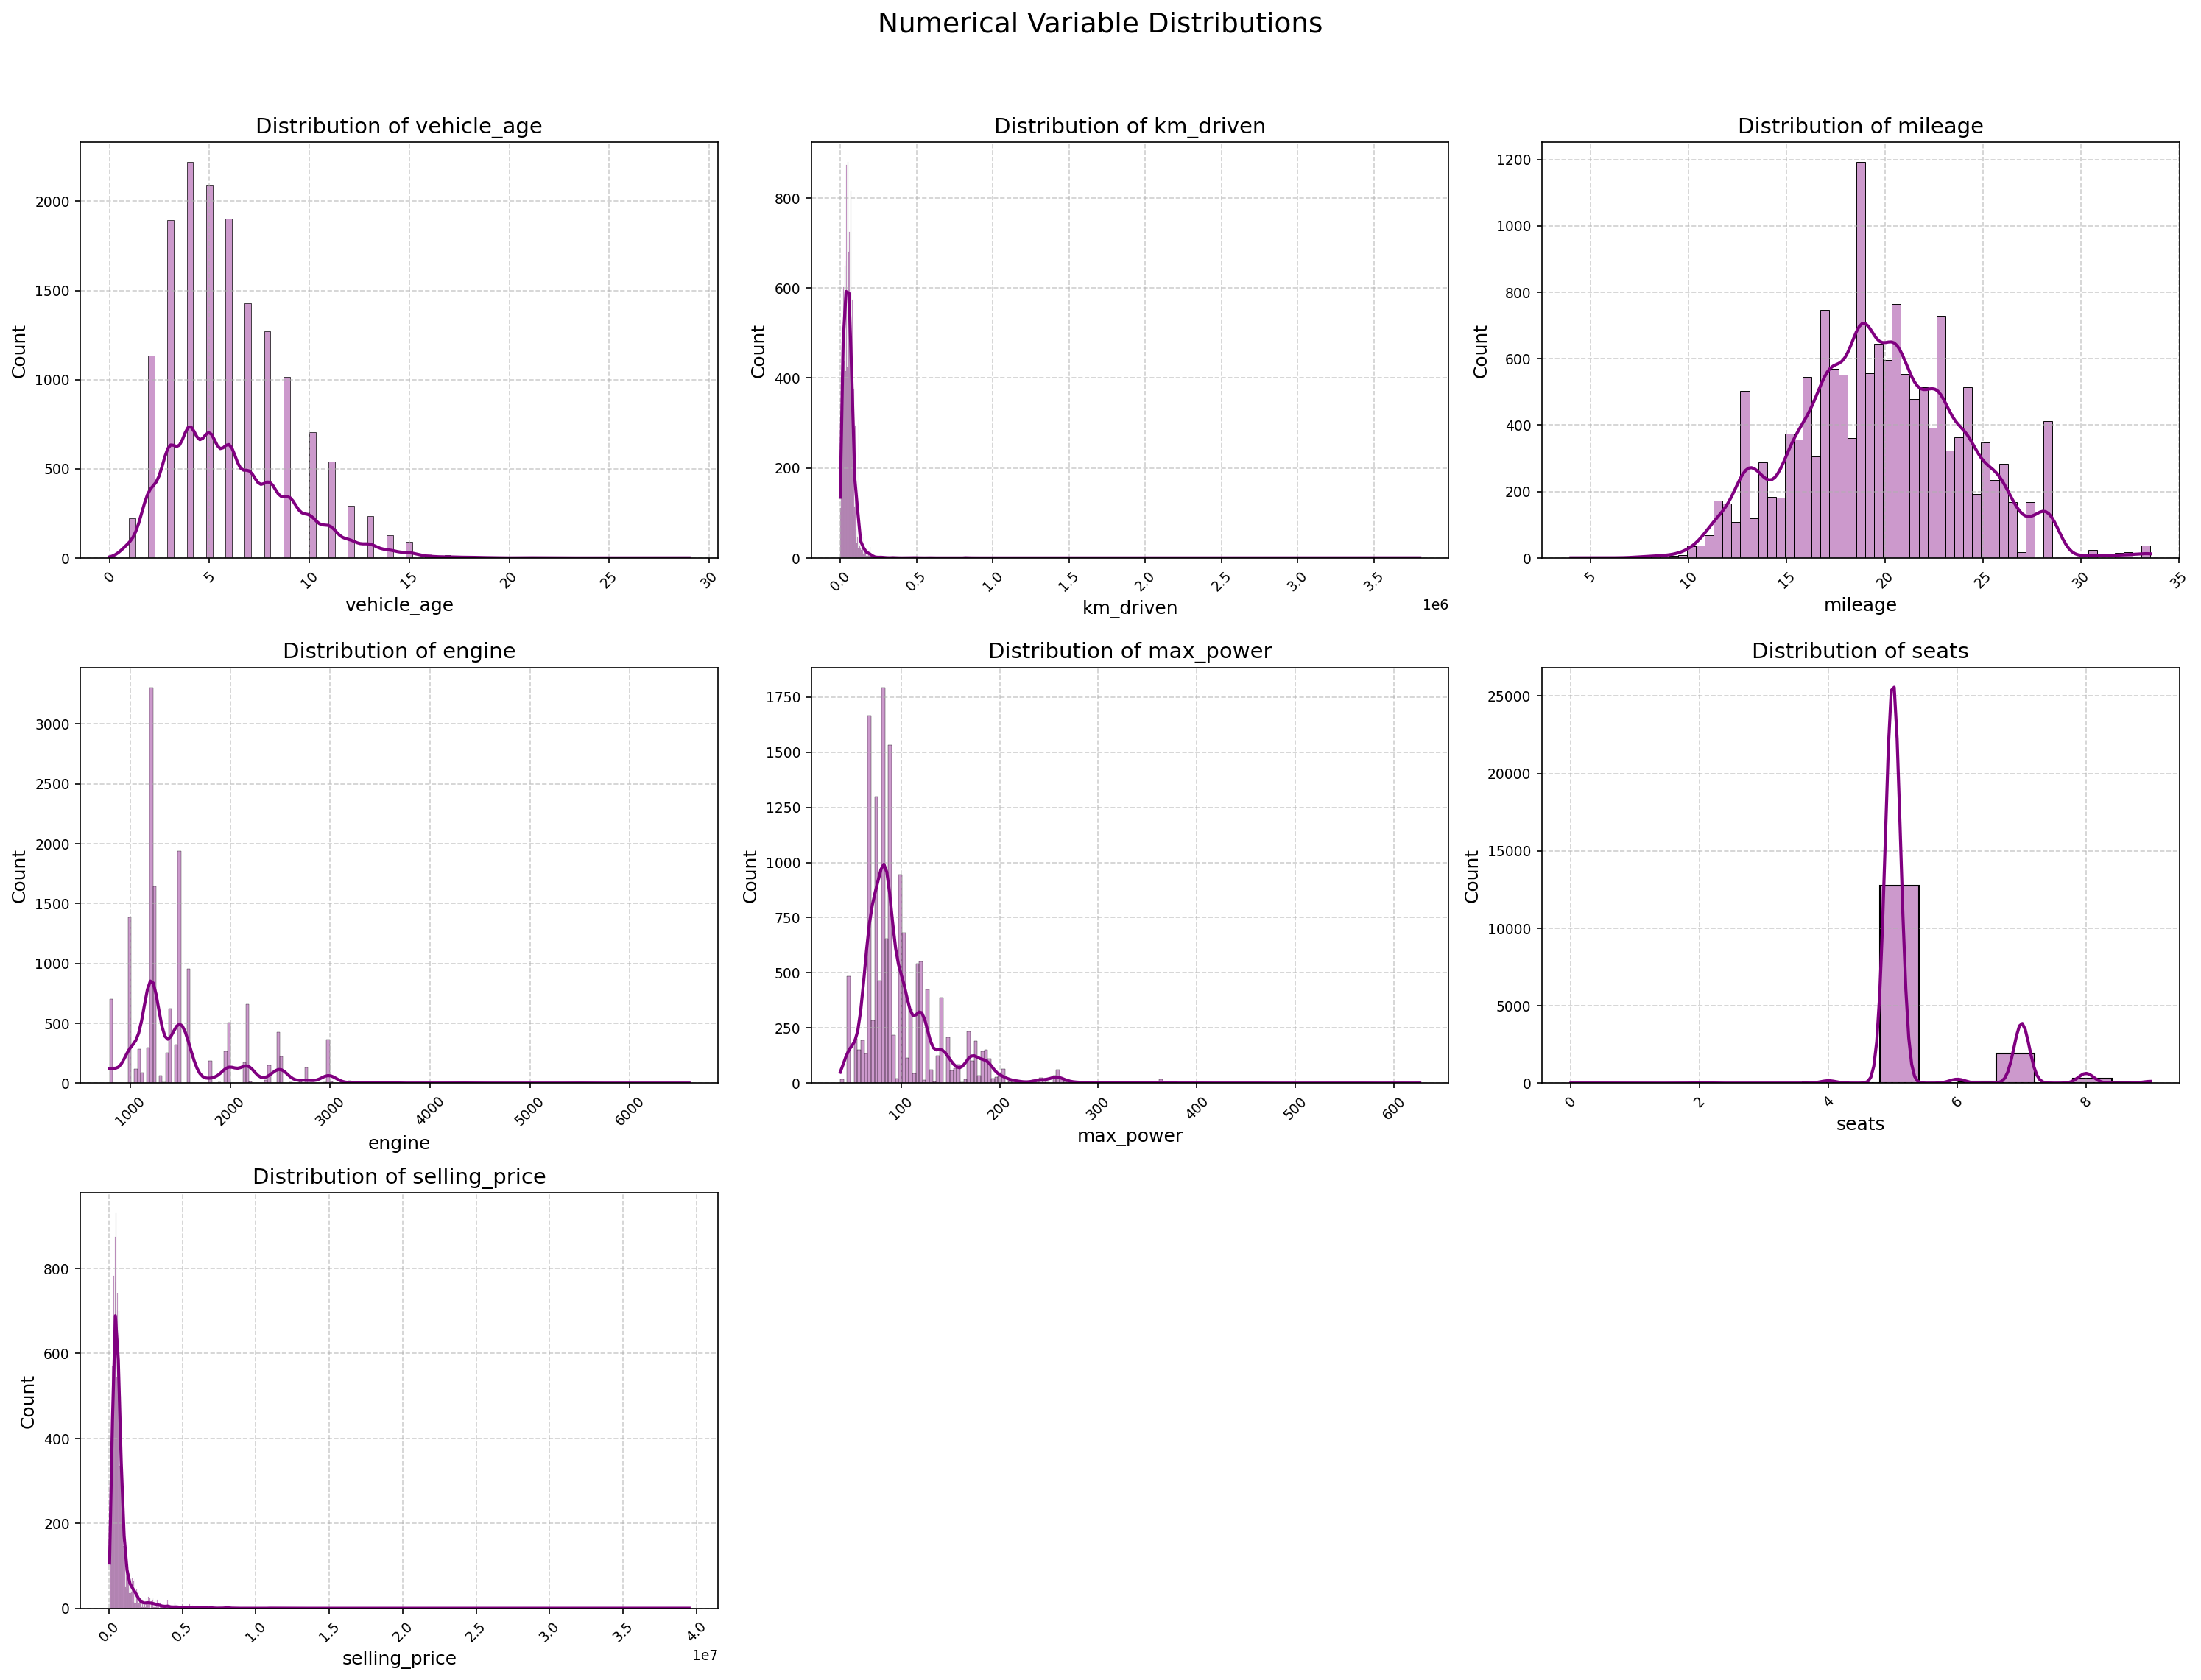

In [271]:
NumCols = ["vehicle_age", "km_driven", "mileage", "engine", "max_power", "seats", "selling_price"]

n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15), dpi=150)  # Bigger size
axes = axes.flatten()

for i, col in enumerate(NumCols):
    sns.histplot(df_car[col].dropna(), kde=True, ax=axes[i],
                 color = 'purple', alpha=0.4, line_kws={'lw': 2.0})
    
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].grid(True, linestyle='--', alpha=0.6)

for j in range(len(NumCols), len(axes)):
    axes[j].axis('off')

plt.suptitle('Numerical Variable Distributions', fontsize=18, y=1.01)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


INSIGHTS:

>Most cars are 4–8 years old, showing a slight right skew with fewer very old vehicles.

>The distribution of Km_driven is highly right-skewed, with most cars driven below 1 lakh km, and a few extreme outliers above 10 lakh km.
 
>Mileage follows a near-normal distribution, typically between 15–22 km/l, reflecting standard efficiency for petrol/diesel cars.
 
>Most engines fall in the 1000–1600 cc range, though a long tail suggests a few high-performance outliers.

>A majority of cars output 60–120 bhp, but outliers with very high power (>300 bhp) skew the distribution.

>5-seater cars dominate the dataset, with minimal entries for 2-, 6-, 7-, or 8-seaters, likely SUVs or vans.

>The price distribution is extremely right-skewed, where most cars are below ₹10 lakhs, and a few luxury outliers exceed ₹1 crore.

#### Selling Price by Categorical Variables 

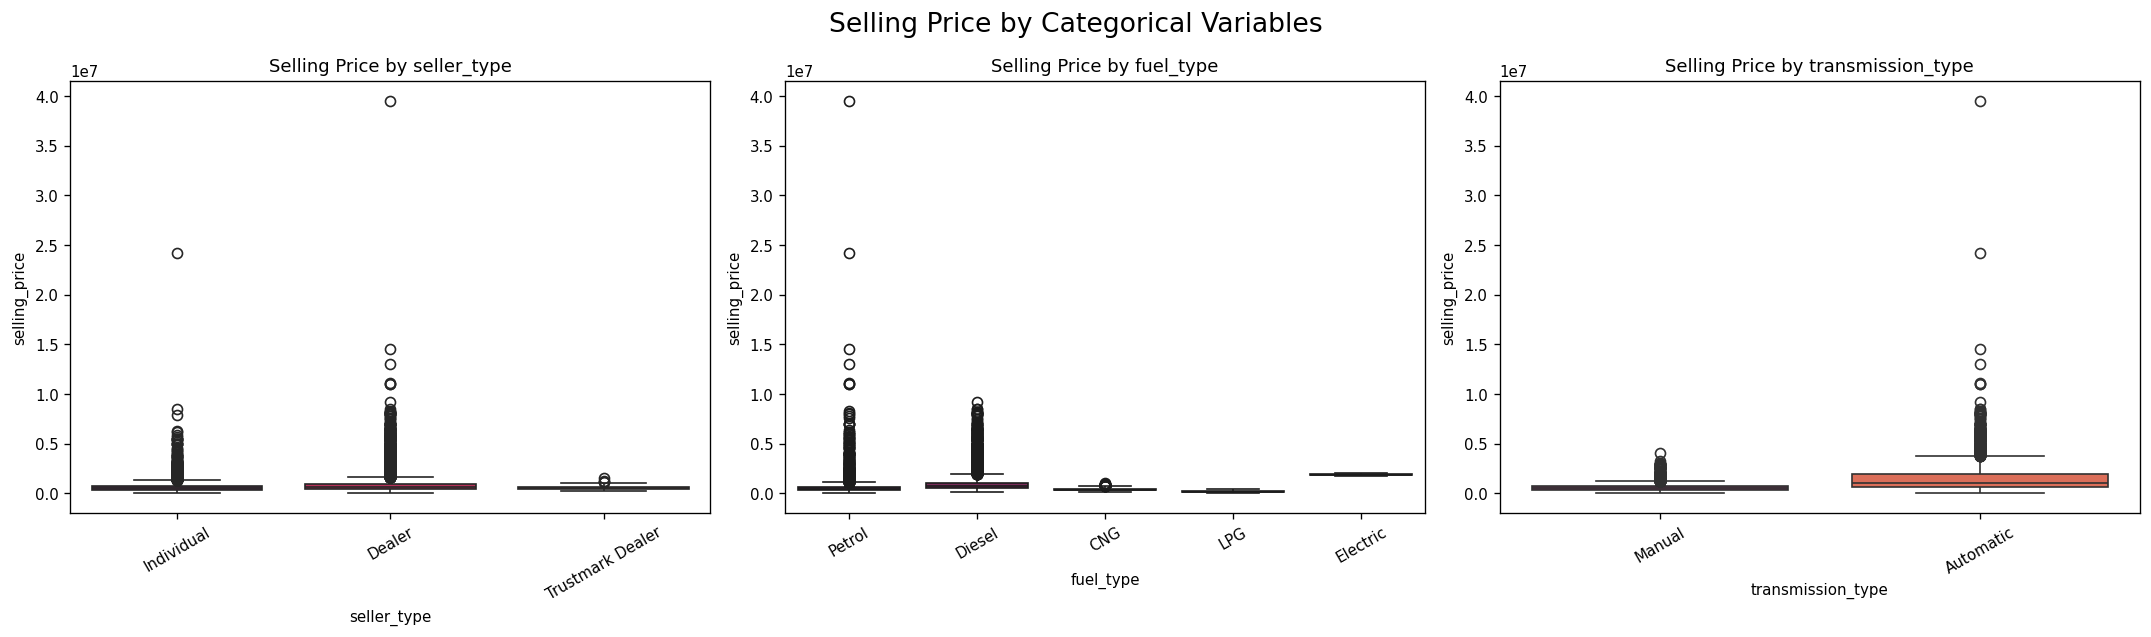

In [272]:
fig, axes = plt.subplots(1, len(CatCols), figsize=(18, 5), dpi=120)
for i, col in enumerate(CatCols):
    sns.boxplot(data=df_car, x=col, y='selling_price', ax=axes[i], palette='rocket')
    axes[i].set_title(f'Selling Price by {col}')
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.suptitle("Selling Price by Categorical Variables", fontsize=16, y=1.05)
plt.show()


INSIGHTS:

Seller Type:
>Trustmark Dealers tend to sell cars at higher median prices compared to individuals and regular dealers, possibly due to certified vehicle quality or added services.

Fuel Type:
>Electric and diesel vehicles generally have higher selling prices, while LPG and CNG vehicles are priced lower, likely due to market preference and vehicle segments.

Transmission Type:
>Cars with automatic transmission have a higher median selling price than manual ones, which aligns with their generally higher purchase cost and premium perception.

#### Selling Price by Numerical Variables

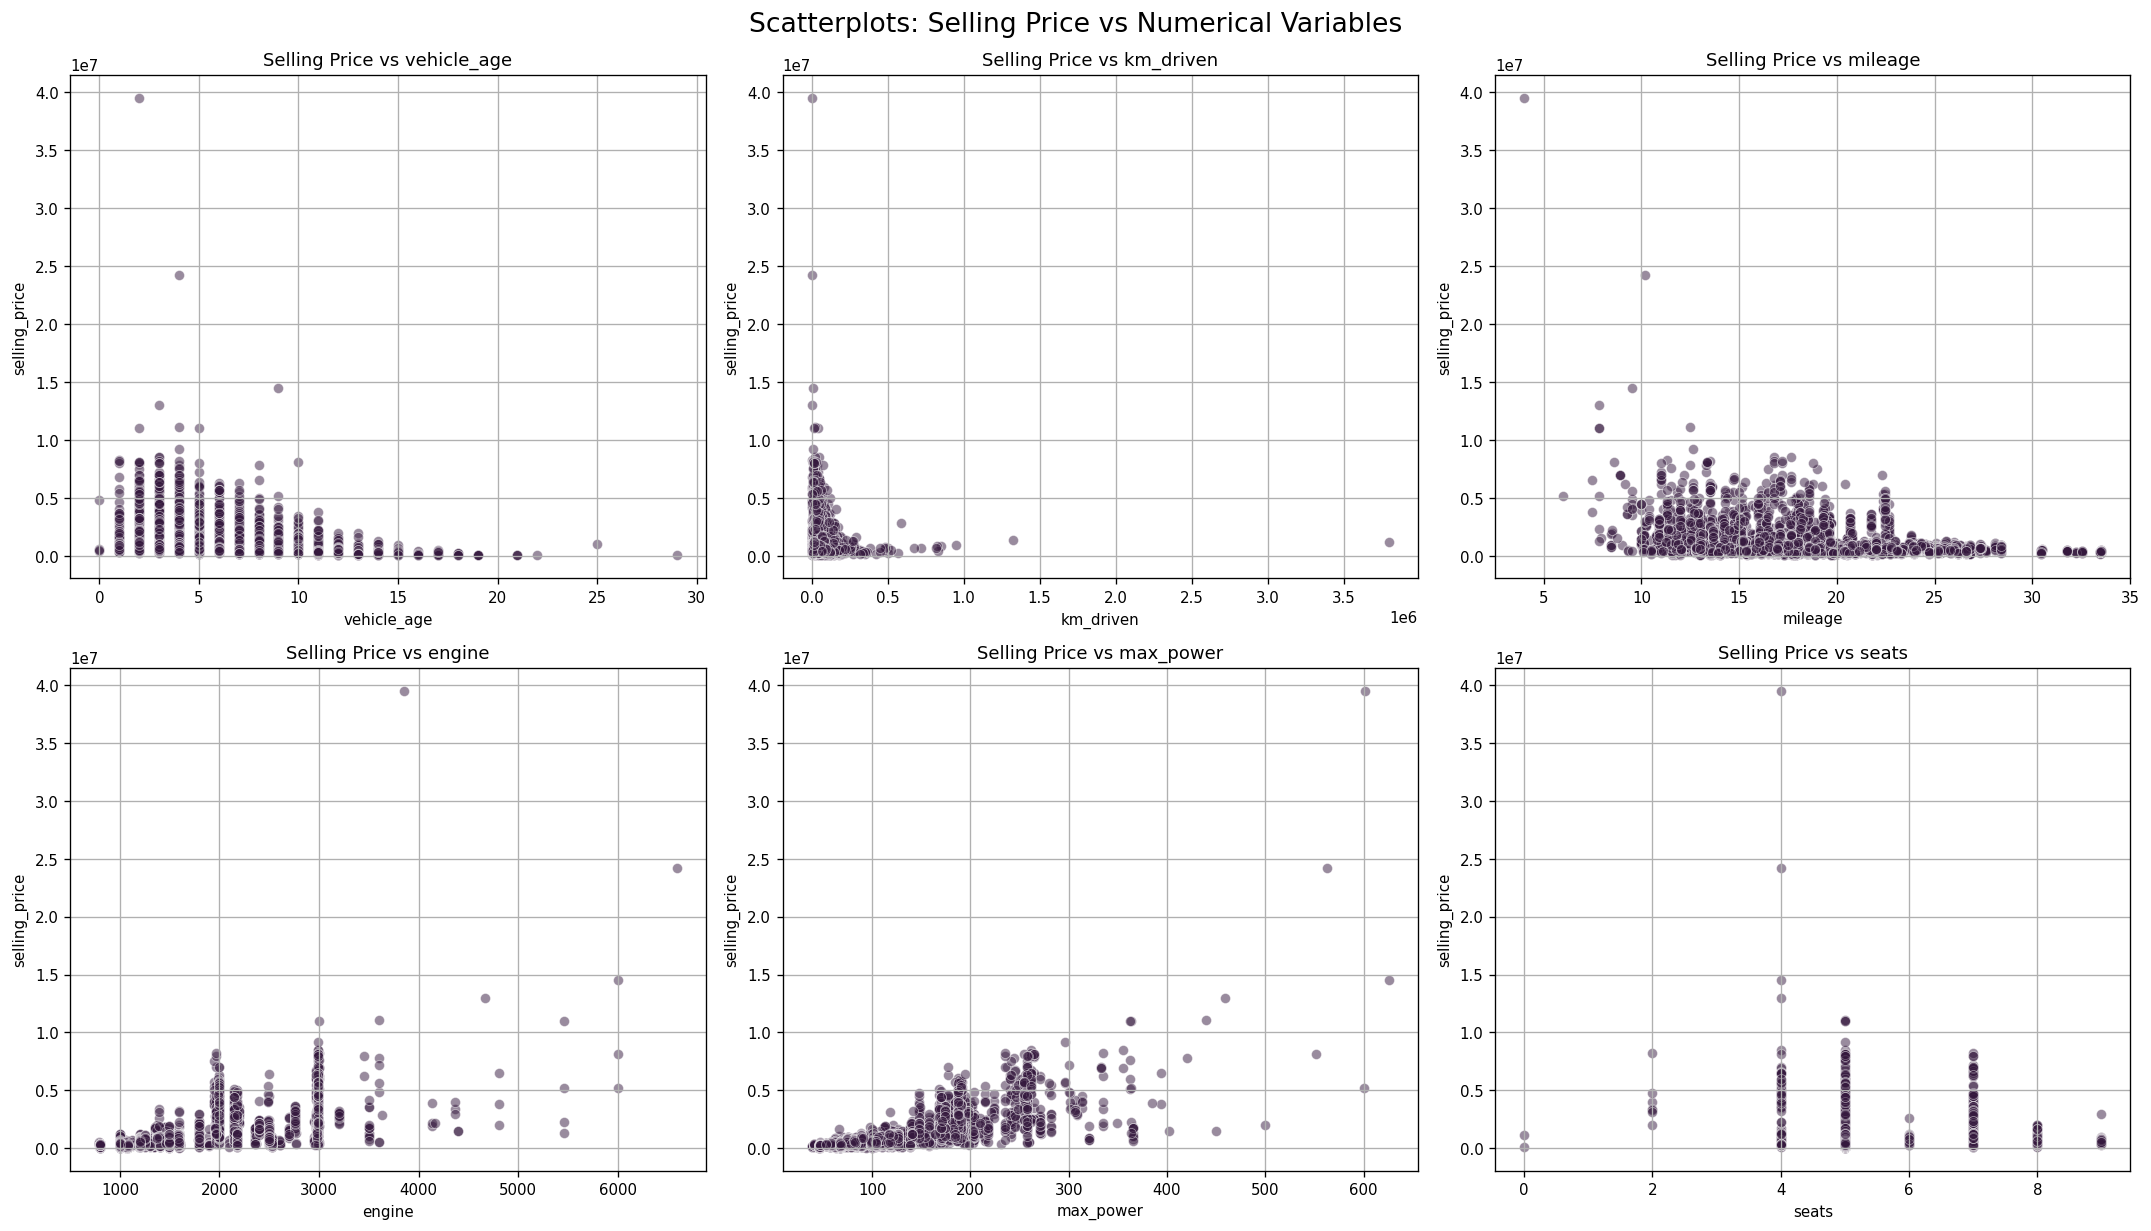

In [273]:
NumCols = ["vehicle_age", "km_driven", "mileage", "engine", "max_power", "seats"]
fig, axes = plt.subplots(2, 3, figsize=(18, 10), dpi=120)
axes = axes.flatten()

for i, col in enumerate(NumCols):
    sns.scatterplot(data=df_car, x=col, y='selling_price', ax=axes[i], alpha=0.5, palette='rocket')
    axes[i].set_title(f'Selling Price vs {col}')
    axes[i].grid(True)

plt.tight_layout()
plt.suptitle("Scatterplots: Selling Price vs Numerical Variables", fontsize=16, y=1.02)
plt.show()


INSIGHTS:

Vehicle Age:
> Newer cars tend to have significantly higher selling prices.

Kilometers Driven:
> Selling price sharply declines as the number of kilometers driven increases.

Mileage:
> Cars with moderate mileage (12–20 kmpl) are priced higher than those at extremes.

Engine:
> Higher engine capacity generally corresponds to higher prices, though with some variability.

Max Power:
> Selling price increases with max power, especially beyond 100 bhp.

Seats:
> 5-seater cars dominate the market and tend to have a wide range of prices.

#### Boxplot for Outlier Detection

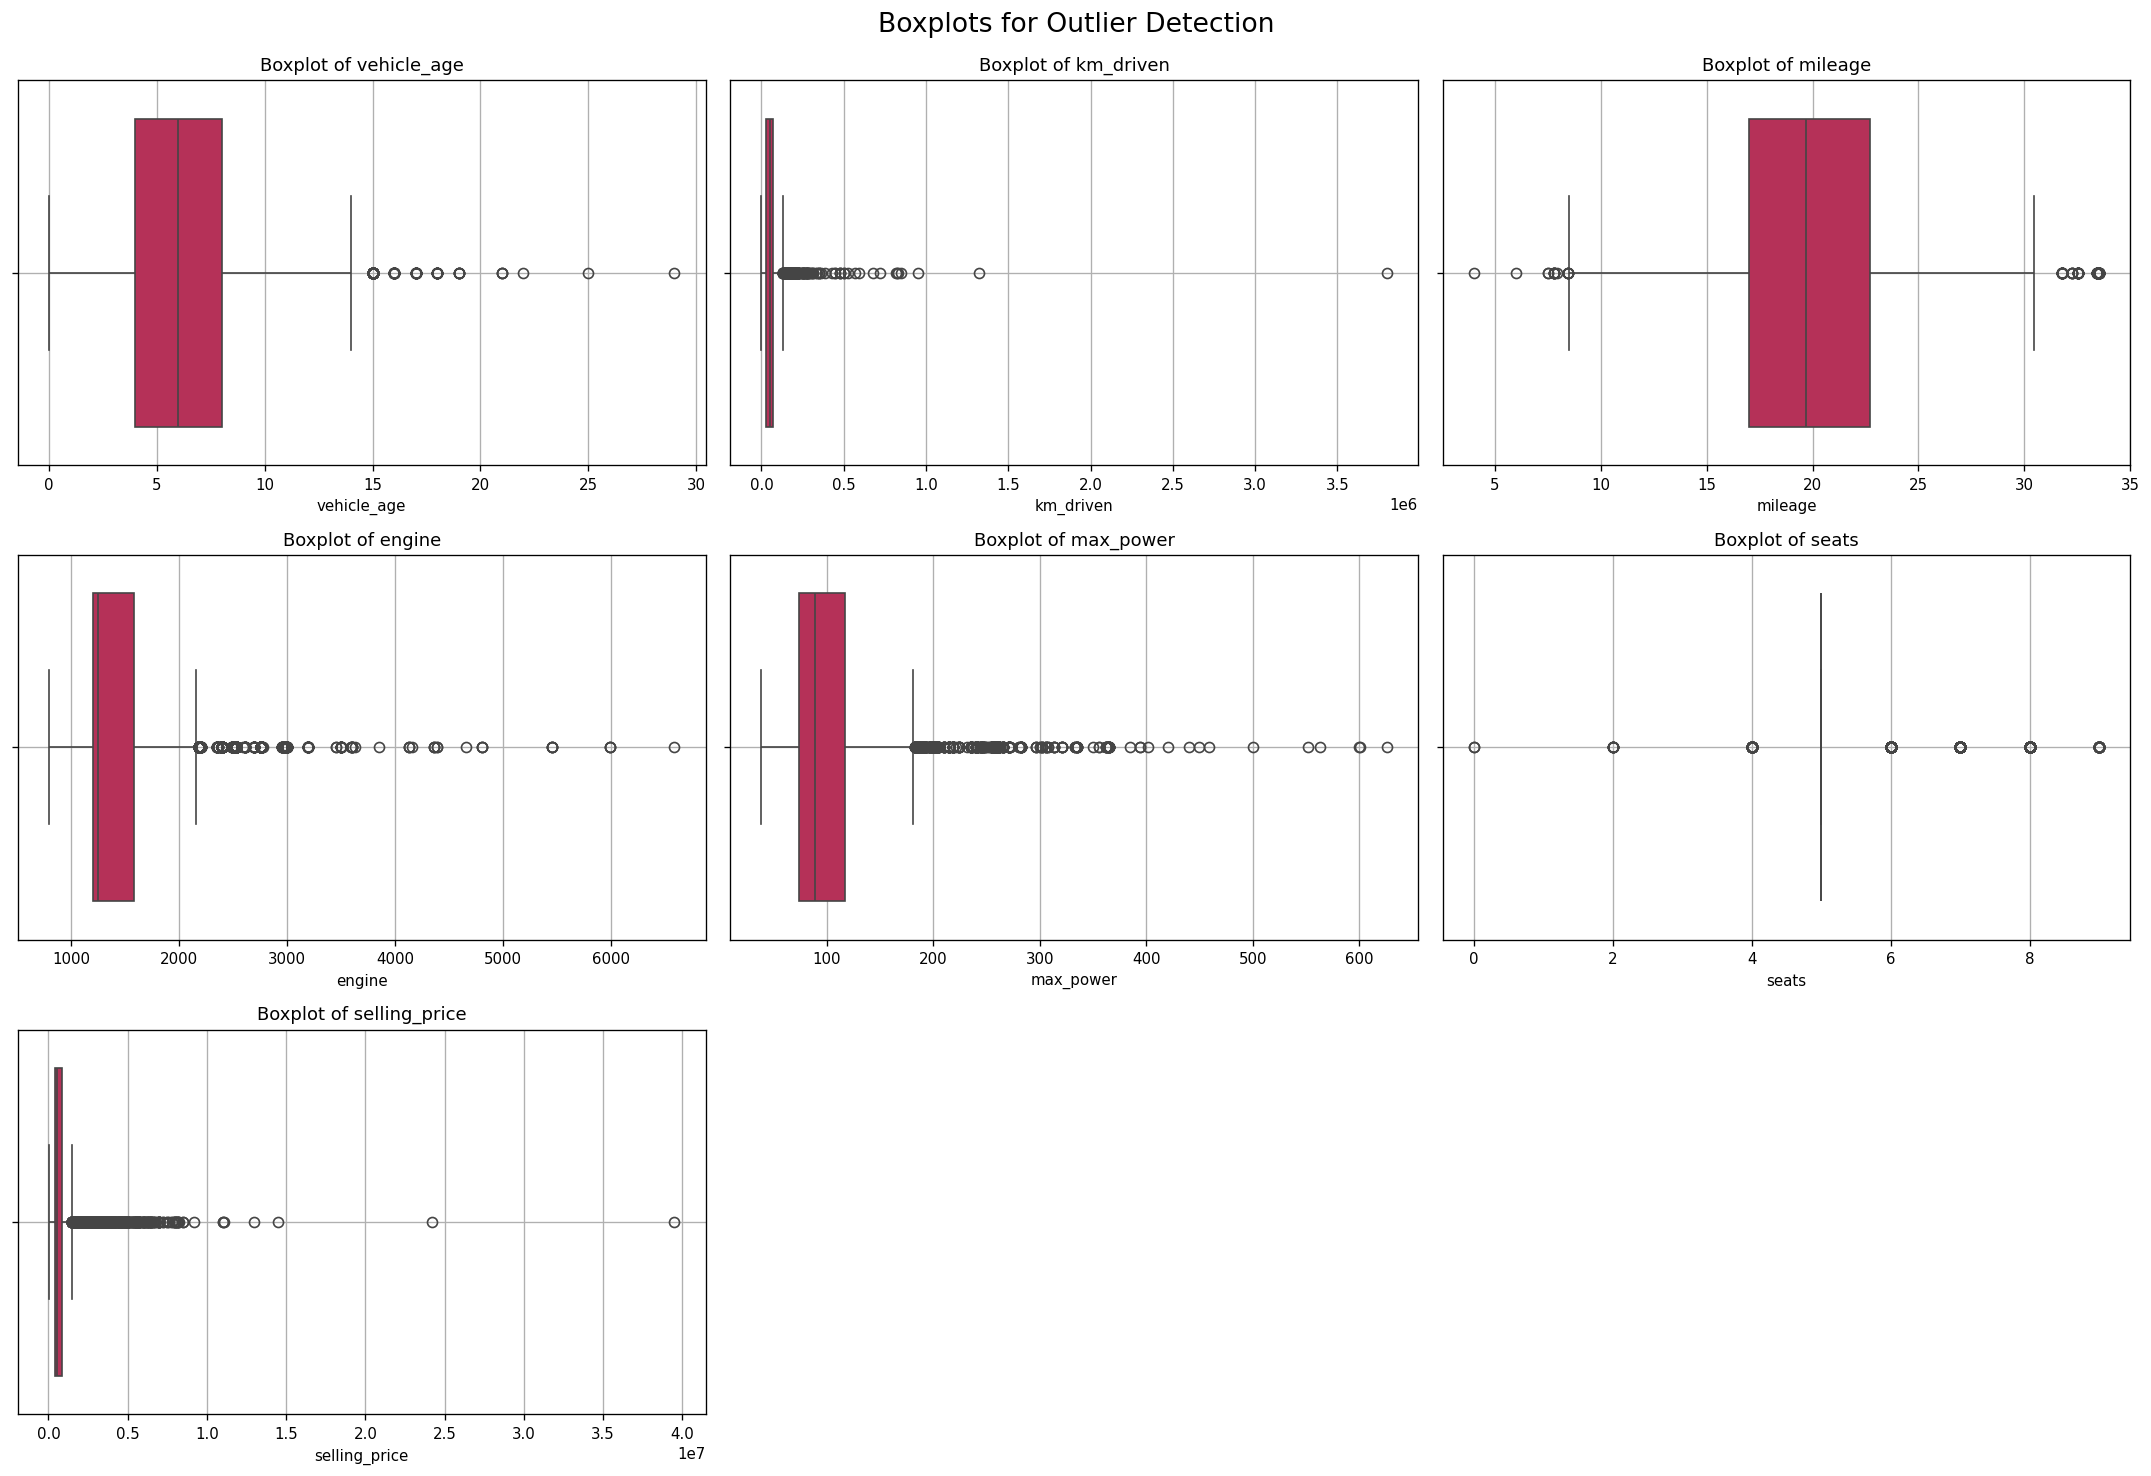

In [274]:
NumCols_w_price = NumCols + ['selling_price']
fig, axes = plt.subplots(3, 3, figsize=(18, 12), dpi=120)
axes = axes.flatten()

for i, col in enumerate(NumCols_w_price):
    sns.boxplot(data=df_car, x=col, ax=axes[i], palette='rocket')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(True)

# Hide unused subplot if total columns < 9
for j in range(len(NumCols_w_price), 9):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Boxplots for Outlier Detection", fontsize=16, y=1.02)
plt.show()


INSIGHTS:

Vehicle Age:
>Most cars are under 10 years old; a few older vehicles are clear outliers.

Kilometers Driven:
>Majority of cars have less than 2 lakh km driven, but extreme high values (>5 lakh km) are significant outliers.

Mileage:
>Mileage mostly ranges from 15 to 25 kmpl, with both low (<10) and high (>30) values as outliers.

Engine:
>Engine capacities beyond 3000 cc are rare and appear as upper-end outliers.

Max Power:
>Cars with power above 200 bhp are unusual and show up as outliers.

Seats:
>Most cars have 5 seats; values below 4 or above 7 are outliers.

Selling Price:
>Majority of used cars are priced below ₹20 lakhs, while a few luxury vehicles skew the distribution heavily.

#### Selling Price by Top Car Brands

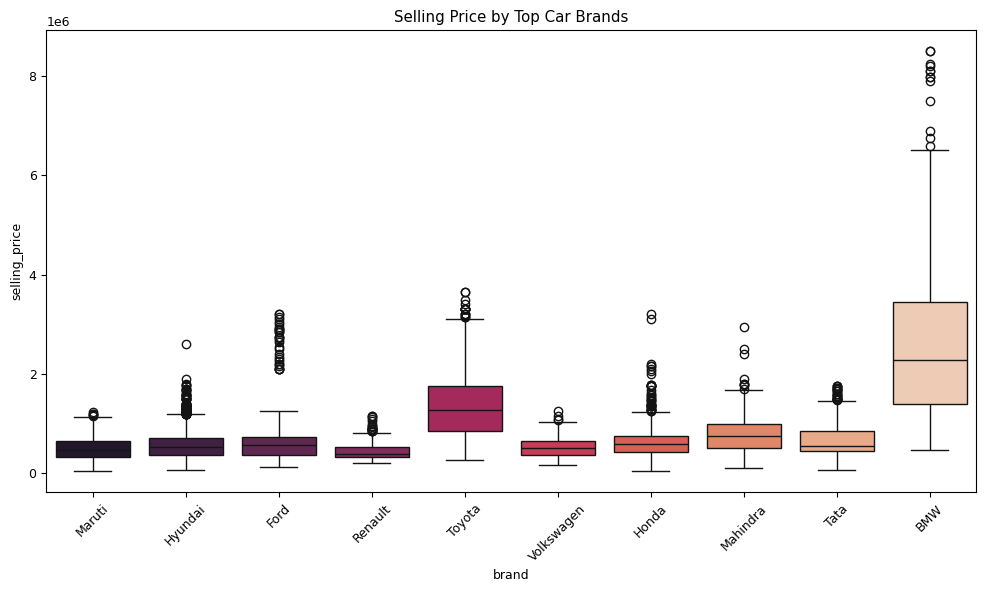

In [275]:
top_brands = df_car['brand'].value_counts().head(10).index
brand_data = df_car[df_car['brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=brand_data, x='brand', y='selling_price', palette='rocket')
plt.xticks(rotation=45)
plt.title("Selling Price by Top Car Brands")
plt.show()


INSIGHTS:

>BMW leads with the highest median and widest price range, indicating a luxury market segment.

>Toyota follows with a high median price and notable spread, suggesting strong presence in both economy and premium categories.

>Maruti, Tata, and Renault show the lowest median selling prices, reinforcing their image as budget-friendly brands.

>Hyundai, Honda, and Mahindra have moderate pricing with some premium outliers, indicating a mixed portfolio.

>Volkswagen and Ford sit in the mid-range, but with fewer extreme outliers compared to others.

#### Vehicle Age Vs Selling Price

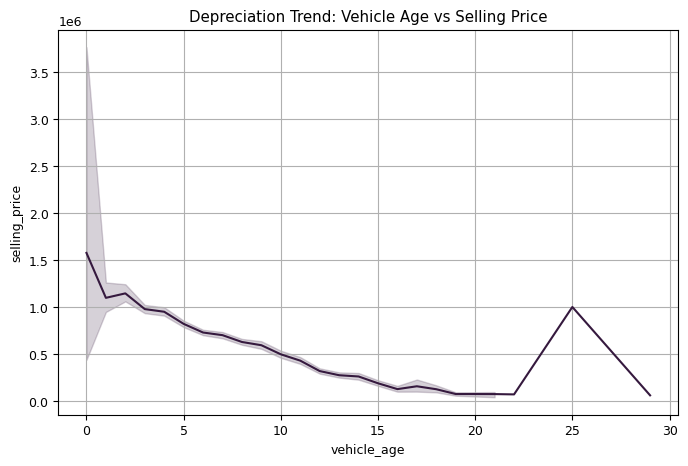

In [276]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_car, x='vehicle_age', y='selling_price',palette='rocket')
plt.title("Depreciation Trend: Vehicle Age vs Selling Price")
plt.grid(True)
plt.show()


INSIGHTS:

>Selling price sharply declines with increasing vehicle age, especially in the first 10 years, highlighting rapid depreciation.

>A sudden price spike around age 25 suggests rare or vintage car listings that skew the average upward.

#### Average Selling Price by Transmission and Fuel Type

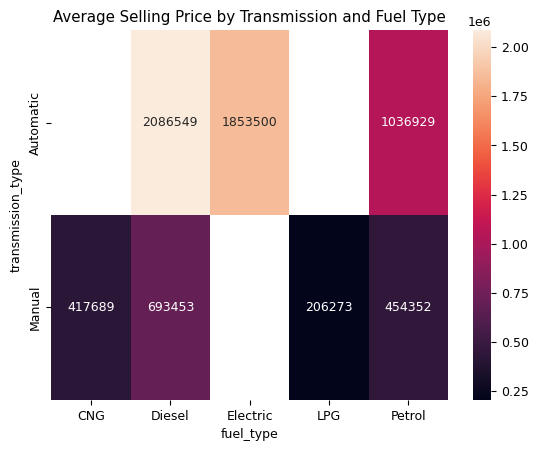

In [277]:
pivot = df_car.pivot_table(index='transmission_type', columns='fuel_type',
                           values='selling_price', aggfunc='mean')

sns.heatmap(pivot, annot=True, fmt=".0f", cmap='rocket',)
plt.title("Average Selling Price by Transmission and Fuel Type")
plt.show()


INSIGHTS:

>Automatic diesel cars have the highest average selling price, suggesting strong market demand for this configuration.

>Manual LPG cars fetch the lowest prices, indicating lower resale value and possibly lesser market preference.

>Electric cars with automatic transmission also command high prices, reflecting their premium positioning in the used car market.

>Across all fuel types, automatic cars consistently sell for more than manual ones, highlighting buyer preference for convenience.

#### Distribution of Price per Unit Power

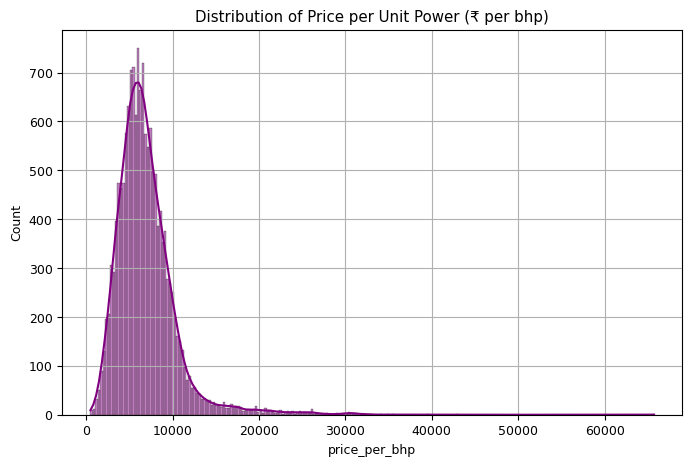

In [278]:
df_car['price_per_bhp'] = df_car['selling_price'] / df_car['max_power']

plt.figure(figsize=(8, 5))
sns.histplot(df_car['price_per_bhp'].dropna(), kde=True, color='purple')
plt.title("Distribution of Price per Unit Power (₹ per bhp)")
plt.grid(True)
plt.show()


INSIGHTS:

>The distribution of price per unit power (₹/bhp) is right-skewed, indicating that most used cars are priced moderately per bhp, with a few high-end outliers commanding a premium.

>Majority of cars fall between ₹4,000–₹10,000 per bhp, suggesting a common affordability range for power among buyers.

#### Mileage Vs Selling Price by Fuel Type

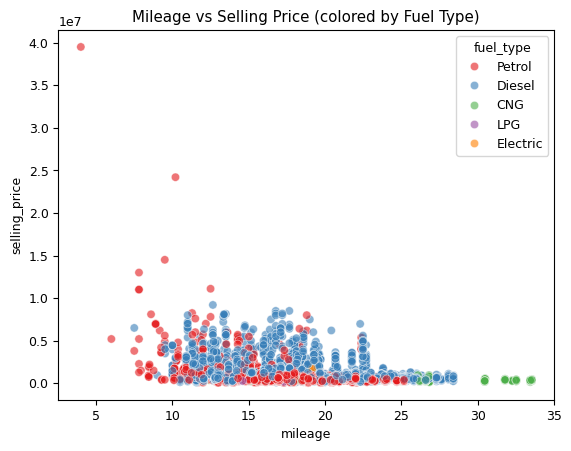

In [279]:
sns.scatterplot(
    data=df_car,
    x='mileage',
    y='selling_price',
    hue='fuel_type',
    palette='Set1',
    alpha=0.6
)
plt.title("Mileage vs Selling Price (colored by Fuel Type)")
plt.show()


INSIGHTS:

>Diesel and Petrol cars dominate the market in terms of volume, but Diesel cars tend to have higher selling prices at similar mileage levels compared to Petrol.

>Higher mileage cars generally have lower selling prices, indicating depreciation with usage, especially evident in CNG and LPG vehicles.

>Electric vehicles appear in low numbers and cluster around mid-to-high mileage with relatively moderate prices.

#### Top 10 Highest Priced Car

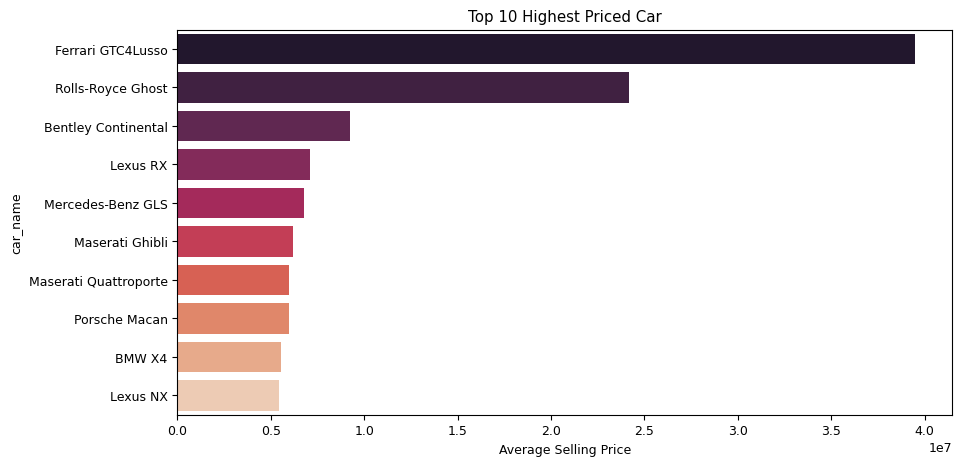

In [280]:
top_models = df_car.groupby('car_name')['selling_price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_models.values, y=top_models.index, palette='rocket')
plt.xlabel("Average Selling Price")
plt.title("Top 10 Highest Priced Car")
plt.show()


INSIGHTS:

>Ferrari GTC4Lusso and Rolls-Royce Ghost lead the list with significantly higher average selling prices, far exceeding other models.

>The top three spots are occupied by ultra-luxury brands (Ferrari, Rolls-Royce, Bentley), indicating strong brand value and exclusivity.

>Premium SUVs like the Lexus RX and Mercedes-Benz GLS also feature in the top 10, highlighting the rising value of luxury utility vehicles.

#### Correlation Analysis

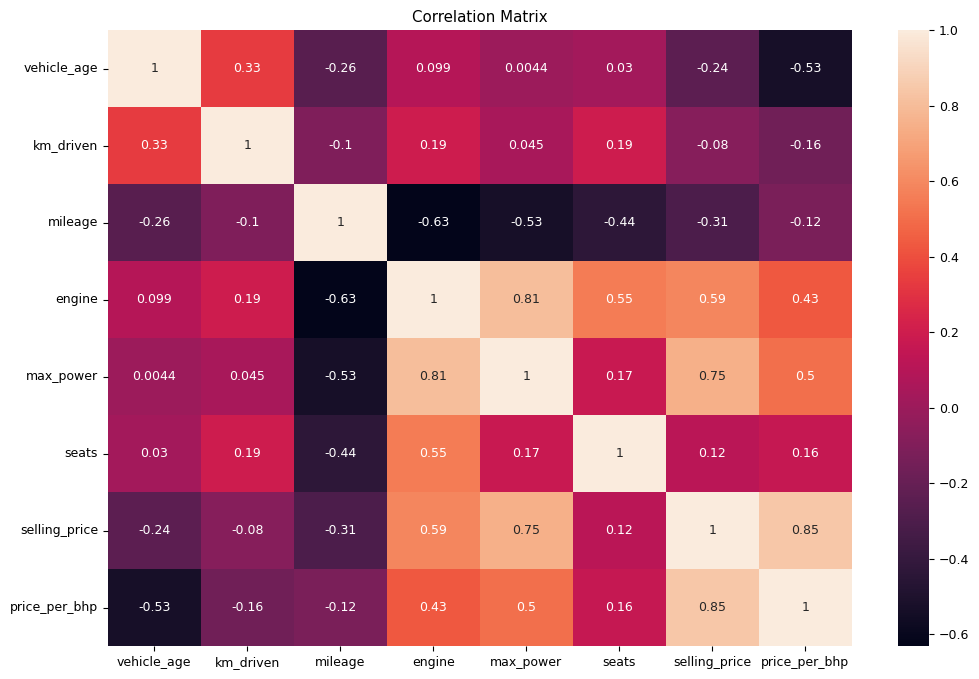

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric-only for correlation
df_corr = df_car.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='rocket')
plt.title('Correlation Matrix')
plt.show()

INSIGHTS:

>Performance features (engine & power) are primary drivers of car price.

>Efficiency (mileage) tends to inversely relate with price — fuel-efficient cars are often lower-priced.

>Depreciation (vehicle age) has a noticeable negative impact, but not as strongly as performance specs.

In [282]:
df_corr.corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,price_per_bhp
vehicle_age,1.000000,0.332725,-0.257599,0.098734,0.004356,0.030268,-0.241228,-0.530757
km_driven,0.332725,1.000000,-0.104979,0.192721,0.044776,0.192026,-0.079548,-0.164173
mileage,-0.257599,-0.104979,1.000000,-0.632161,-0.532172,-0.439943,-0.305128,-0.123712
engine,0.098734,0.192721,-0.632161,1.000000,0.807287,0.551401,0.585713,0.432481
max_power,0.004356,0.044776,-0.532172,0.807287,1.000000,0.172264,0.751058,0.504605
seats,0.030268,0.192026,-0.439943,0.551401,0.172264,1.000000,0.115299,0.161333
selling_price,-0.241228,-0.079548,-0.305128,0.585713,0.751058,0.115299,1.000000,0.846818
price_per_bhp,-0.530757,-0.164173,-0.123712,0.432481,0.504605,0.161333,0.846818,1.000000


### Feature Engineering

In [283]:
# Create new features
df_car['km_per_year'] = df_car['km_driven'] / df_car['vehicle_age']
df_car['engine_power_ratio'] = df_car['engine'] / df_car['max_power']


As part of feature engineering, two new features were created to capture deeper insights from existing variables:

km_per_year:
>It helps normalize usage across cars of different ages and can indicate how heavily a vehicle has been used annually.

engine_power_ratio:
>It provides a measure of engine efficiency or tuning, potentially reflecting performance characteristics that influence selling price.

In [284]:
df_car

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,price_per_bhp,km_per_year,engine_power_ratio
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,2591.792657,13333.333333,17.192225
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,6707.317073,4000.000000,14.597561
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,2687.500000,5454.545455,14.962500
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,3368.107303,4111.111111,14.873323
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,5781.519424,5000.000000,15.194239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000,3673.769287,1191.444444,15.958854
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000,10153.677278,9000.000000,15.071350
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000,4105.486862,11166.666667,14.470634
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000,8750.000000,760000.000000,15.564286


In [285]:
df_car.drop(['brand','model','car_name','price_per_bhp','engine','max_power','km_driven'], axis=1, inplace=True)


### Encoding Categorical Variables

In [286]:
from sklearn.preprocessing import OneHotEncoder
from pandas import DataFrame
from sklearn.compose import ColumnTransformer

CatCols = ['seller_type', 'transmission_type','fuel_type']

ohe = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), CatCols)
    ],
    remainder='passthrough'  # keep other columns as is
)

df_encoded_array = ohe.fit_transform(df_car)

ohe_columns = ohe.named_transformers_['cat'].get_feature_names_out(CatCols)
other_columns = [col for col in df_car.columns if col not in CatCols]
new_columns = list(ohe_columns) + other_columns

df1 = pd.DataFrame(df_encoded_array, columns=new_columns)

df1.index = df_car.index

df1.head(5)

,seller_type_Individual,seller_type_Trustmark Dealer,transmission_type_Manual,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,vehicle_age,mileage,seats,selling_price,km_per_year,engine_power_ratio
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,19.70,5.0,120000.0,13333.333333,17.192225
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,18.90,5.0,550000.0,4000.000000,14.597561
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,17.00,5.0,215000.0,5454.545455,14.962500
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,20.92,5.0,226000.0,4111.111111,14.873323
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6.0,22.77,5.0,570000.0,5000.000000,15.194239


### Model Training

In [287]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [288]:
X = df1.drop(columns=['selling_price'])
y = df1['selling_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

numeric_cols = [
    'vehicle_age',
    'mileage',
    'seats',
    'km_per_year',
    'engine_power_ratio'
]

X_train[numeric_cols] = X_train[numeric_cols].replace([np.inf, -np.inf], np.nan)
X_test[numeric_cols] = X_test[numeric_cols].replace([np.inf, -np.inf], np.nan)

X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].mean())
X_test[numeric_cols] = X_test[numeric_cols].fillna(X_test[numeric_cols].mean())

# Scaling
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

### Linear Regression 

In [289]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

print("Intercept:", model.intercept_)
print("\n Coefficients:\n", coeff_df.sort_values(by='Coefficient', key=abs, ascending=False))


Intercept: 1606779.2082288973

 Coefficients:
                          Feature    Coefficient
6               fuel_type_Petrol -686361.199132
2       transmission_type_Manual -569457.215444
5                  fuel_type_LPG -486760.396996
8                        mileage -372322.913800
7                    vehicle_age -281931.127894
11            engine_power_ratio -169535.567166
4             fuel_type_Electric  106615.591413
1   seller_type_Trustmark Dealer  -93827.066012
9                          seats  -59606.517702
10                   km_per_year  -55651.788066
0         seller_type_Individual  -41677.024440
3               fuel_type_Diesel  -23632.362351


In [290]:
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score, MAPE], index=['MAE', 'MSE', 'RMSE' ,'R2-Score','MAPE %'], columns=[model_name])

In [291]:
model_evaluation(model, X_test_scaled, y_test, 'Linear Reg.')

,Linear Reg.
MAE,3.215870e+05
MSE,3.094763e+11
RMSE,5.563060e+05
R2-Score,4.616924e-01
MAPE %,5.965516e+01


The baseline linear regression explains only 46% variance (R² = 0.46), with a very high MAPE of ~59% and MAE of ₹3.2 lakh, indicating poor predictive accuracy and large pricing errors — confirming it’s not a good fit for this dataset.

### Checking Linear Regression Assumptions

In [292]:
def residuals(model, X_test, y_test):
    '''
    Creates predictions on the features with the model and calculates residuals
    '''
    y_pred = model.predict(X_test)
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

#### Assumption 1: Linearity

In [293]:
def linear_assumption(model, X_test, y_test):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model
    '''
    df_results = residuals(model, X_test, y_test)
    
    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    sns.regplot(x='Predicted', y='Actual', data=df_results, lowess=True, ax=ax[0],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[0].set_title('Actual vs. Predicted Values', fontsize=15)
    ax[0].set_xlabel('Predicted', fontsize=12)
    ax[0].set_ylabel('Actual', fontsize=12)        
    
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True, ax=ax[1],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=15)
    ax[1].set_xlabel('Predicted', fontsize=12)
    ax[1].set_ylabel('Residuals', fontsize=12)  

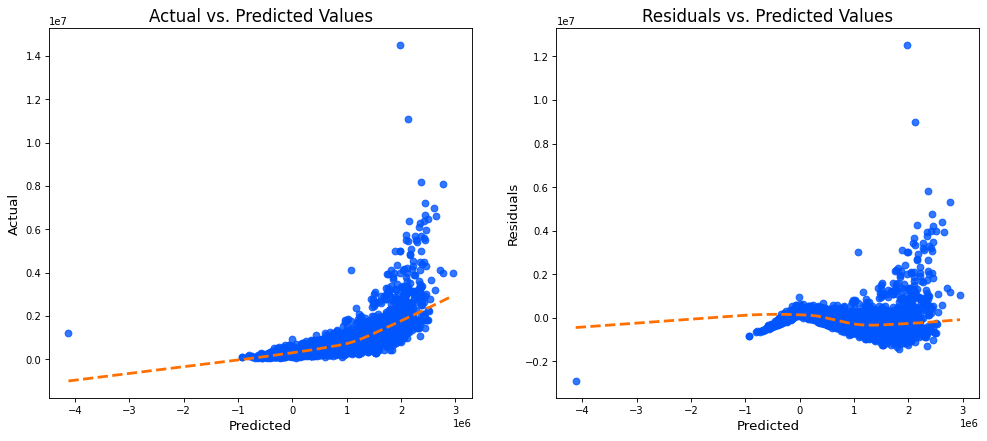

In [294]:
linear_assumption(model, X_test_scaled, y_test)

#### Assumption 2: Normality of Residuals

In [295]:
def normal_errors_assumption(model, X_test, y_test, p_value_thresh=0.05):
    '''
    Function for inspecting the assumption of normality of residuals.
    '''
    df_results = residuals(model, X_test, y_test)
    
    # Anderson-Darling Test
    p_value = normal_ad(df_results['Residuals'])[1]
    
    print('\nP-value from the test (below 0.05 generally means non-normal):  ', np.round(p_value,6))
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed. Assumption not satisfied.') 
    else:
        print('Residuals are normally distributed. Assumption satisfied.')

      
    # Residuals Histogram
    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    
    sns.histplot(data=df_results, x='Residuals', kde=True, ax=ax[0], bins=15, 
                 color='#0055ff', edgecolor='none', alpha=0.4, line_kws={'lw': 2.5})
    ax[0].set_xlabel('Residuals', fontsize=12)
    ax[0].set_ylabel('Count', fontsize=12)
    ax[0].set_title('Distribution of Residuals', fontsize=15)
    textstr = '\n'.join((
        r'$\mu=%.2f$' %np.mean(df_results['Residuals']),
        r'$\sigma=%.2f$' %np.std(df_results['Residuals']),
        ))
    ax[0].text(0.7, 0.9, textstr, transform=ax[0].transAxes, fontsize=15, verticalalignment='top',
                 bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))
    
    
    # Q-Q Probability Plot
    stats.probplot(df_results['Residuals'], dist="norm", plot= ax[1])
    ax[1].set_title("Residuals Q-Q Plot", fontsize=15)
    ax[1].set_xlabel('Theoretical Quantiles', fontsize=12)
    ax[1].set_ylabel('Ordered Values', fontsize=12)
    ax[1].get_lines()[0].set_markerfacecolor('#509aff')
    ax[1].get_lines()[1].set_color('#ff7000')
    ax[1].get_lines()[1].set_linewidth(2.5)
    ax[1].get_lines()[1].set_linestyle('--')
    ax[1].legend(['Actual','Theoretical'])
    
    plt.show()


P-value from the test (below 0.05 generally means non-normal):   0.0
Residuals are not normally distributed. Assumption not satisfied.


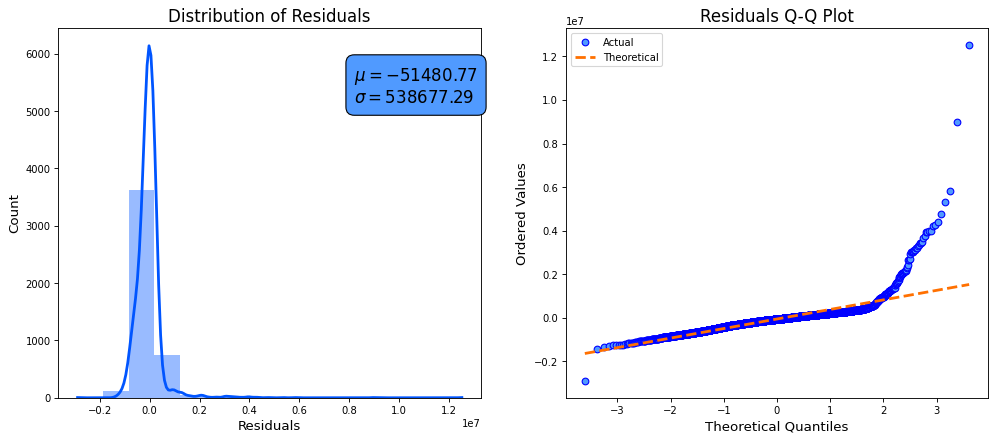

In [296]:
normal_errors_assumption(model, X_test_scaled, y_test)

#### Assumption 3 - Multicollinearity

In [297]:
def multicollinearity_assumption(X):
    """
    Calculates VIF for each feature and checks multicollinearity.
    X must be a pandas DataFrame with no NaNs or infs.
    """
    
    X_clean = X.replace([np.inf, -np.inf], np.nan).dropna()

    vif = [variance_inflation_factor(X_clean.values, i) for i in range(X_clean.shape[1])]
    
    result = pd.DataFrame({'Feature': X_clean.columns, 'VIF': vif}).round(2)
    
    possible = sum(result['VIF'] > 10)
    definite = sum(result['VIF'] > 100)

    print(f"{possible} features show possible multicollinearity (VIF > 10).")
    print(f"{definite} features show definite multicollinearity (VIF > 100).")

    if definite == 0 and possible == 0:
        print("Multicollinearity assumption satisfied.")
    elif definite == 0:
        print("Possibly satisfied — some features have moderate multicollinearity.")
    else:
        print("Multicollinearity assumption violated — consider dropping or combining features.")

    return result


In [298]:
multicollinearity_assumption(X)

5 features show possible multicollinearity (VIF > 10).
0 features show definite multicollinearity (VIF > 100).
Possibly satisfied — some features have moderate multicollinearity.


,Feature,VIF
0,seller_type_Individual,1.69
1,seller_type_Trustmark Dealer,1.03
2,transmission_type_Manual,6.20
3,fuel_type_Diesel,19.19
4,fuel_type_Electric,1.01
5,fuel_type_LPG,1.11
6,fuel_type_Petrol,16.80
7,vehicle_age,5.40
8,mileage,17.36
9,seats,44.60


#### Assumption 4 - No Autocorrelation of Residuals

In [299]:
def autocorrelation_assumption(model, X_test, y_test):
    '''
    It assumes that there is no autocorrelation in the residuals. If there is autocorrelation, then 
    there is a pattern that is not explained because the current value is dependent on the previous value.
    '''
    df_results = residuals(model, X_test, y_test)

    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', round(durbinWatson,3))
    
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation. Assumption not satisfied.', '\n')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation. Assumption not satisfied.', '\n')
    else:
        print('Little to no autocorrelation. Assumption satisfied.', '\n')

In [300]:
autocorrelation_assumption(model, X_test_scaled, y_test)

Durbin-Watson: 2.024
Little to no autocorrelation. Assumption satisfied. 



#### Assumption 5 - Homoscedasticity

In [301]:
def homoscedasticity_assumption(model, X_test, y_test):
    """
    Homoscedasticity assumes that the residuals exhibit constant variance
    """
    print('The orange line should be flat:')
    df_results = residuals(model, X_test, y_test)
    
    fig = plt.figure(figsize=(6,6), dpi=80)
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True,
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    plt.axhline(y=0, color='#23bf00', lw=1)
    plt.title('Residuals vs. Predicted Values', fontsize=15)
    plt.xlabel('Predicted Values', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)    
    plt.show()

The orange line should be flat:


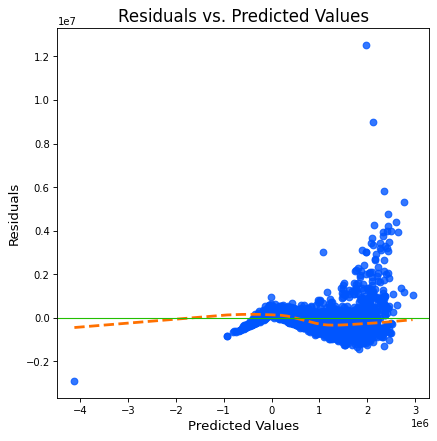

In [302]:
homoscedasticity_assumption(model, X_test_scaled, y_test)

>Linear regression was found unsuitable for used car price prediction as key assumptions were violated, including non-linearity, multicollinearity, non-normal residuals, and heteroscedasticity. These limitations prevent the model from capturing complex market dynamics and interactions among features. 

>Tree-based algorithms such as Random Forest, Gradient Boosting, and XGBoost overcome these issues by handling non-linear relationships, outliers, and categorical effects more effectively, while also delivering stronger predictive performance and actionable business insights for CarDekho’s valuation system.

#### Decision Tree Regressor

In [303]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

param_grid = {
    'max_depth': [1,3,5,7,9,10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

dt = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='r2', 
                           n_jobs=-1, 
                           verbose=1)

grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred_dt = best_dt.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
medae_dt = median_absolute_error(y_test, y_pred_dt)

print(f"Decision Tree with Tuned Hyperparameters:")
print(f"R2 Score: {r2_dt:.4f}")
print(f"MAE: {mae_dt:,.2f}")
print(f"RMSE: {rmse_dt:,.2f}")


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree with Tuned Hyperparameters:
R2 Score: 0.7406
MAE: 139,696.84
RMSE: 386,190.81


#### Random Forest Regressor

In [304]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [300],        # number of trees
    'max_depth': [10,15,20],         # depth of trees
    'min_samples_split': [2],        # minimum samples required to split a node
    'min_samples_leaf': [1],          # minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # number of features considered at each split
    'criterion': ['squared_error', 'absolute_error']  # impurity measures
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Parameters:", grid_search.best_params_)
print("Random Forest Regressor Performance After Tuning:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'criterion': 'squared_error', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Regressor Performance After Tuning:
R² Score: 0.8754
MAE: 112,841.29
RMSE: 267,631.89


#### Log Transform

In [305]:
# Transform target (y)
y_train_log = np.log1p(y_train)   
y_test_log  = np.log1p(y_test)


rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

# Train on log-transformed target
rf_model.fit(X_train, y_train_log)

# Predict log values
y_pred_log = rf_model.predict(X_test)
# Inverse transform: expm1 reverses log1p
y_pred_rf = np.expm1(y_pred_log)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
medae_rf = median_absolute_error(y_test, y_pred_rf)

print("Random Forest (Log-Transformed Target) Performance:")
print(f"R² Score: {r2_rf:.4f}")
print(f"MAE: {mae_rf:,.2f}")
print(f"RMSE: {rmse_rf:,.2f}")


Random Forest (Log-Transformed Target) Performance:
R² Score: 0.8670
MAE: 102,510.45
RMSE: 276,563.01


>Log transform reduces the effect of extreme car prices by stabilizing skewed data, allowing the model to learn patterns more effectively.

>It improves fairness by focusing on relative percentage changes rather than absolute price differences.

#### XGBoost Regressor

In [306]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 300, 500, 800, 1000],   
    'max_depth': [3, 5, 7, 9, 12],               
    'learning_rate': [0.01, 0.05, 0.1, 0.2],     
    'subsample': [0.6, 0.8, 1.0],                
    'colsample_bytree': [0.6, 0.8, 1.0],        
    'min_child_weight': [1, 3, 5]               
}

xgb = XGBRegressor(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,              
    cv=3,                   
    scoring='r2',           
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train_log)

best_xgb = random_search.best_estimator_

y_pred_log = best_xgb.predict(X_test)
y_pred_xgb = np.expm1(y_pred_log)

r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
medae_xgb = median_absolute_error(y_test, y_pred_xgb)

print("Best Parameters:", random_search.best_params_)
print("\nXGBoost Performance After Tuning:")
print(f"R² Score: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:,.2f}")
print(f"RMSE: {rmse_xgb:,.2f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

XGBoost Performance After Tuning:
R² Score: 0.8628
MAE: 102,499.35
RMSE: 280,884.29


#### LightGBM

In [307]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

lgbm.fit(X_train, y_train_log)

y_pred_log = lgbm.predict(X_test)
y_pred_lgm = np.expm1(y_pred_log) 

r2_lgbm = r2_score(y_test, y_pred_lgm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgm)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgm))
medae_lgbm = median_absolute_error(y_test, y_pred_lgm)

print("LightGBM Performance:")
print(f"R² Score: {r2_lgbm:.4f}")
print(f"MAE: {mae_lgbm:,.2f}")
print(f"RMSE: {rmse_lgbm:,.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 10670, number of used features: 11
[LightGBM] [Info] Start training from score 13.286538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

### Model Comparision

In [308]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "XGBoost", "LightGBM"],
    "R²": [r2_dt, r2_rf, r2_xgb, r2_lgbm],
    "MAE": [mae_dt, mae_rf, mae_xgb, mae_lgbm],
    "RMSE": [rmse_dt, rmse_rf, rmse_xgb, rmse_lgbm],
    "MedAE": [medae_dt, medae_rf, medae_xgb, medae_lgbm],
    "MAPE (%)": [
        mean_absolute_percentage_error(y_test, y_pred_dt),
        mean_absolute_percentage_error(y_test, y_pred_rf),
        mean_absolute_percentage_error(y_test, y_pred_xgb),
        mean_absolute_percentage_error(y_test, y_pred_lgm),
    ]
})

results = results.sort_values(by="MAPE (%)")

In [309]:
print("\nModel Comparison with MAPE and MedAE:")
results


Model Comparison with MAPE and MedAE:


,Model,R²,MAE,RMSE,MedAE,MAPE (%)
2,XGBoost,0.862767,102499.353650,280884.293258,54371.140625,13.295213
1,Random Forest,0.866957,102510.452280,276563.006282,54489.180444,13.524331
3,LightGBM,0.869109,105567.559140,274317.426373,53948.546785,13.529158
0,Decision Tree,0.740578,139696.835861,386190.809679,69191.895113,18.488818


### Feature Importance 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 10670, number of used features: 11
[LightGBM] [Info] Start training from score 787390.065604
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

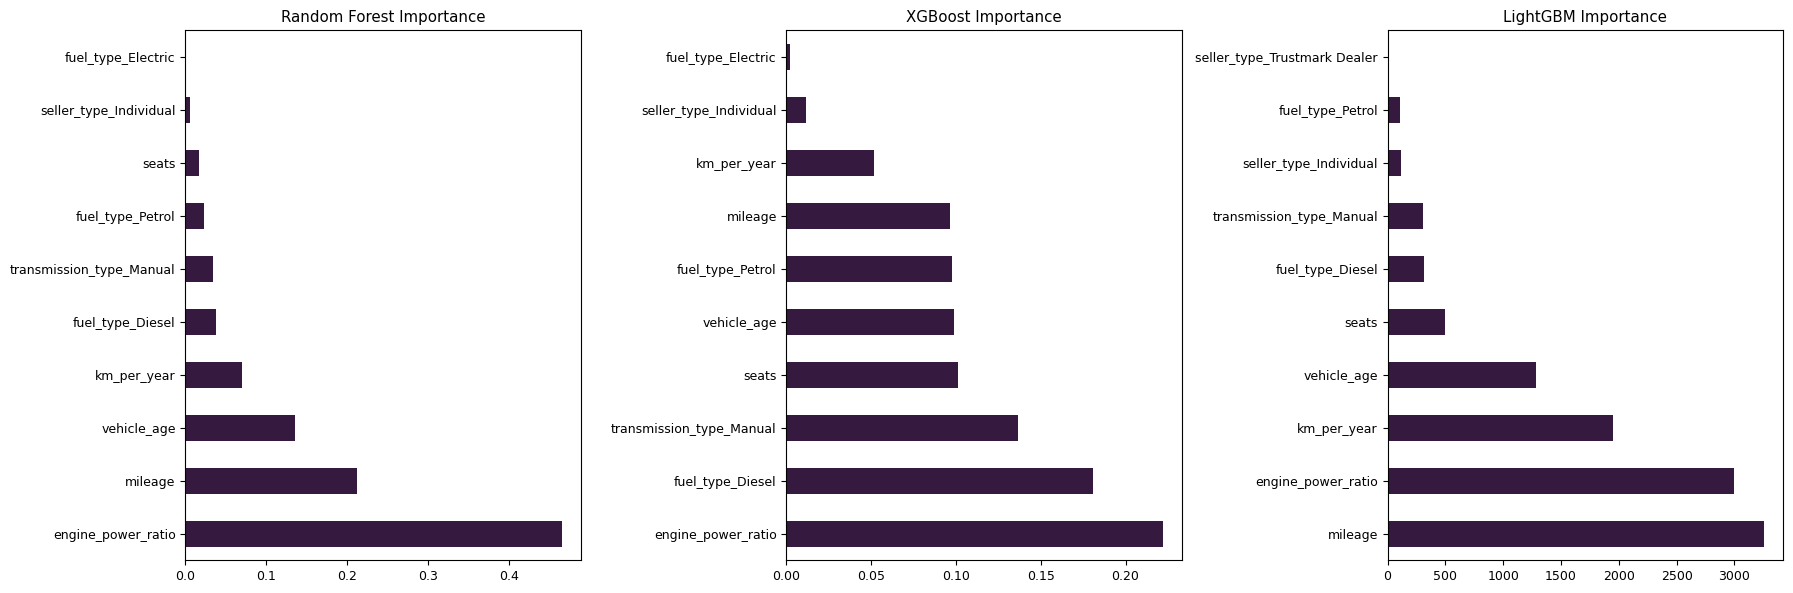

In [310]:
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

# Feature Importance Comparison
rf_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
xgb_importance = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
lgbm_importance = pd.Series(lgbm.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot Feature Importance
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
rf_importance.head(10).plot(kind='barh', ax=axes[0], title="Random Forest Importance")
xgb_importance.head(10).plot(kind='barh', ax=axes[1], title="XGBoost Importance")
lgbm_importance.head(10).plot(kind='barh', ax=axes[2], title="LightGBM Importance")
plt.tight_layout()
plt.show()

Insights:

Common Top Features Across Models
>Engine Power Ratio and Mileage consistently appear as the most important features.

>Vehicle Age and Km Per Year also rank high.
This makes sense: these are core indicators of a car’s value (power, wear-and-tear, and age).


Random Forest
>Very heavy reliance on Engine Power Ratio (almost 45% weight).
>Suggests the model might be a bit biased towards power/engine specs when splitting trees.
>Good but can risk underweighting other important features.

XGBoost

>More balanced importance distribution.
>Engine Power Ratio, Fuel Type (Diesel/Petrol), and Transmission get reasonable weight.
>This indicates XGBoost is capturing interactions between categorical and numeric factors better.

LightGBM

>Also highlights Mileage and Engine Power Ratio as the strongest predictors.
>Slightly more balanced than Random Forest, but not as evenly spread as XGBoost.

### SHAP Values

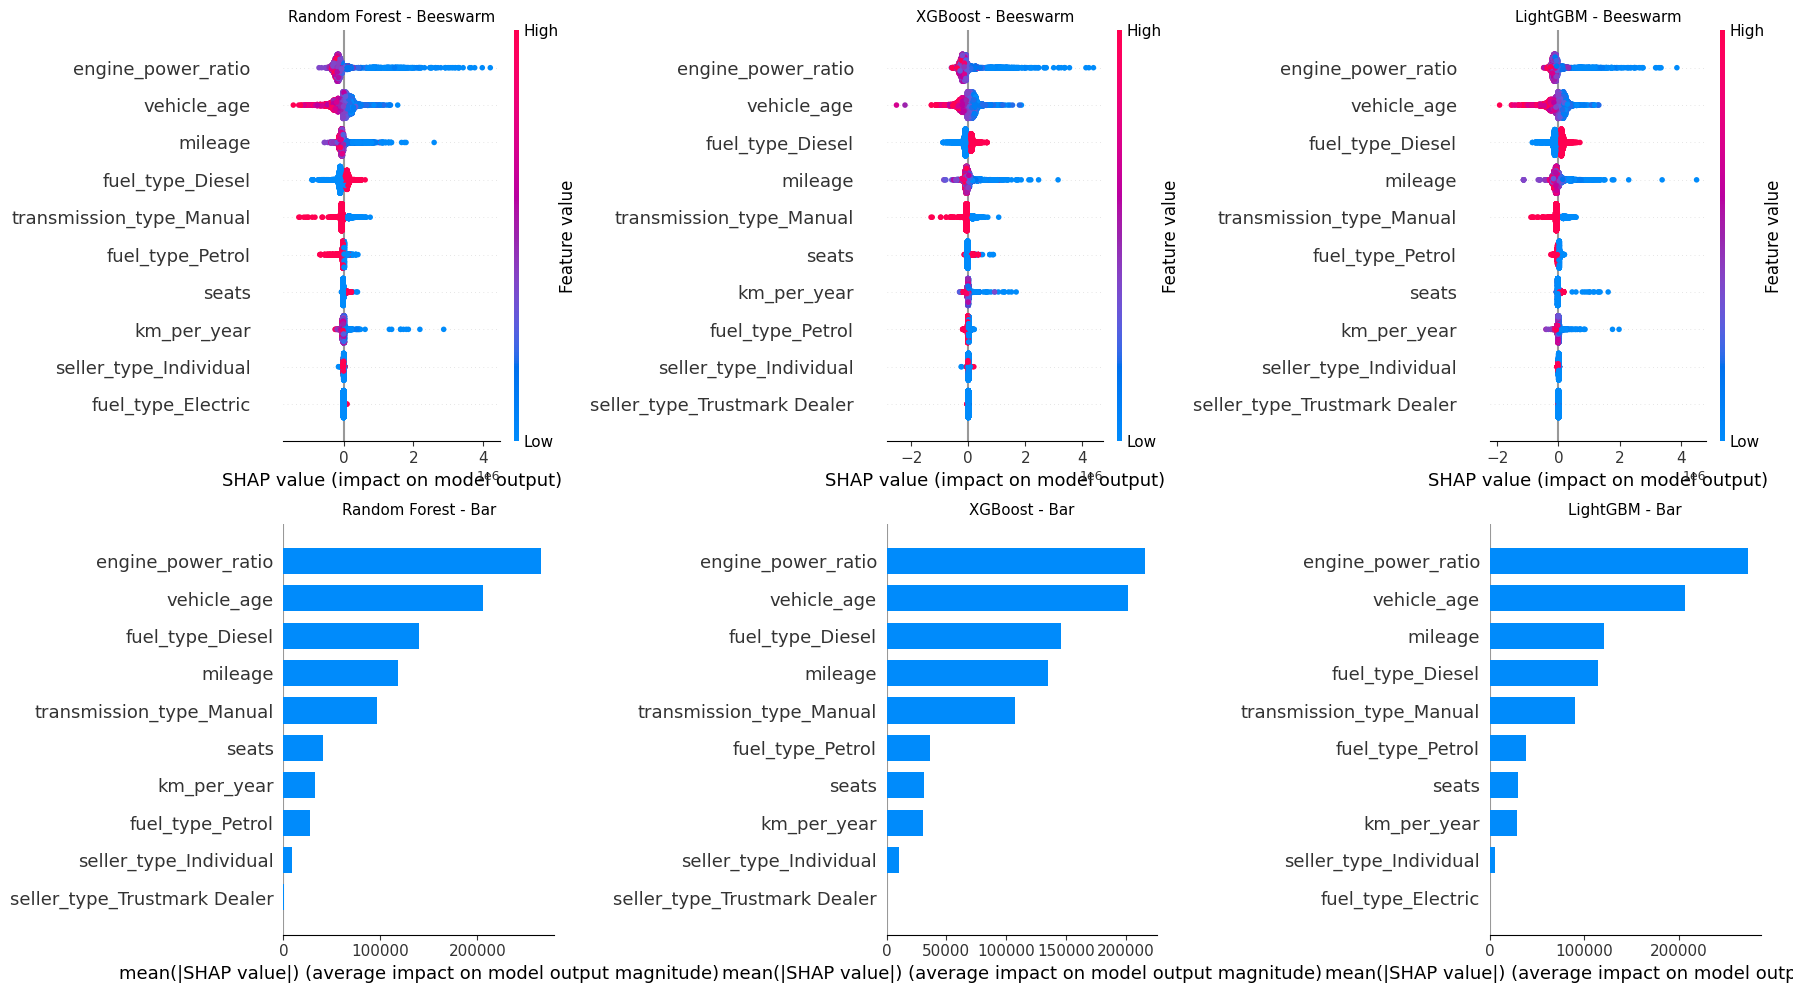

In [311]:
import shap
shap.initjs()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Random Forest
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test)
shap.summary_plot(shap_values_rf, X_test, plot_type="bar", show=False, plot_size=None, color_bar=False, max_display=10)
plt.sca(axes[0,0])  # Set current axis
plt.title("Random Forest - Beeswarm")

shap.summary_plot(shap_values_rf, X_test, show=False, plot_size=None, max_display=10)
plt.sca(axes[1,0]) 
plt.title("Random Forest - Bar")

# XGBoost
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test)
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar", show=False, plot_size=None, color_bar=False, max_display=10)
plt.sca(axes[0,1])
plt.title("XGBoost - Beeswarm")

shap.summary_plot(shap_values_xgb, X_test, show=False, plot_size=None, max_display=10)
plt.sca(axes[1,1])
plt.title("XGBoost - Bar")

# LightGBM
explainer_lgbm = shap.TreeExplainer(lgbm)
shap_values_lgbm = explainer_lgbm.shap_values(X_test)
shap.summary_plot(shap_values_lgbm, X_test, plot_type="bar", show=False, plot_size=None, color_bar=False, max_display=10)
plt.sca(axes[0,2])
plt.title("LightGBM - Beeswarm")

shap.summary_plot(shap_values_lgbm, X_test, show=False, plot_size=None, max_display=10)
plt.sca(axes[1,2])
plt.title("LightGBM - Bar")

plt.tight_layout()
plt.show()


Insights:
>Vehicle Age and Engine Power Ratio consistently emerge as the strongest drivers.

>Unlike feature importance, SHAP shows how they impact: older cars always reduce price (negative SHAP), while higher power ratio boosts price (positive SHAP).

>Mileage and Km_per_year have opposite pulls depending on context: high mileage in budget cars adds value (fuel efficiency), while in premium cars deducts value (wear and tear).

Random Forest
>SHAP reveals that engine power ratio adds strong positive impact, while vehicle age and diesel fuel deduct heavily.

>Unlike feature importance, SHAP makes it clear the model is not just splitting on “power” but actually balancing performance vs depreciation in price predictions.

XGBoost
>SHAP shows more balanced contributions: performance factors (engine power, mileage) push the price up, while diesel and older age consistently pull it down.

>This highlights XGBoost’s ability to capture nuanced trade-offs—e.g., a powerful car with higher mileage can still retain value if other features are strong.

LightGBM
>SHAP indicates a heavier penalty for vehicle age compared to others, showing that LightGBM prioritizes depreciation more strongly.

>Mileage and power ratio also play big roles, but LightGBM consistently deducts value for old vehicles more aggressively.

### SHAP Comparison: What Drives Budget vs. Premium Car Pricing?

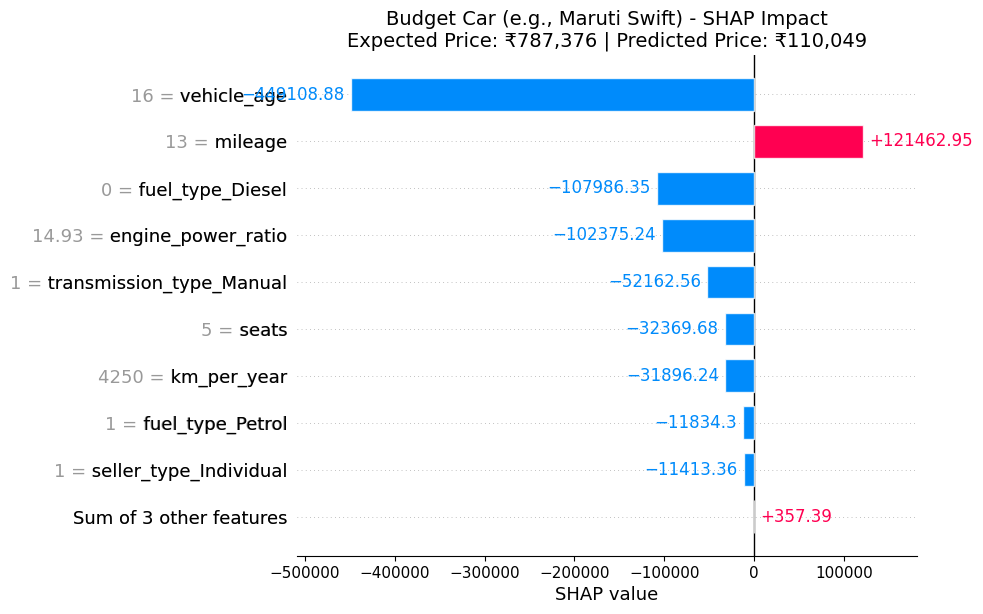

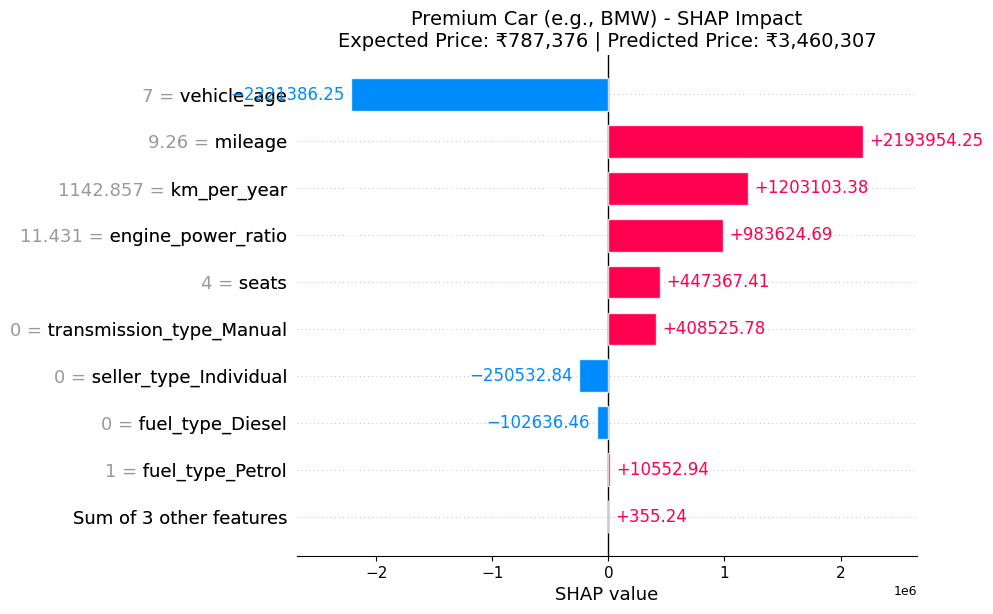

In [312]:
import shap
import matplotlib.pyplot as plt

X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

# CASE 1: Budget Car
budget_idx = y_test_reset[y_test_reset < 70000].index[0]
shap_values_budget = shap_values_xgb[budget_idx]

# Compute expected and predicted price
expected_price_budget = explainer_xgb.expected_value
predicted_price_budget = xgb.predict(X_test_reset.loc[budget_idx,:].values.reshape(1,-1))[0]

plt.figure(figsize=(15,8))
shap.plots.bar(
    shap.Explanation(
        values=shap_values_budget,
        base_values=expected_price_budget,
        data=X_test_reset.loc[budget_idx,:].values,
        feature_names=X_test_reset.columns
    ),
    show=False
)
plt.title(
    f"Budget Car (e.g., Maruti Swift) - SHAP Impact\n"
    f"Expected Price: ₹{expected_price_budget:,.0f} | Predicted Price: ₹{predicted_price_budget:,.0f}",
    fontsize=14
)
plt.show()


# CASE 2: Premium Car
premium_idx = y_test_reset[y_test_reset > 2000000].index[0]
shap_values_premium = shap_values_xgb[premium_idx]

# Compute expected and predicted price
expected_price_premium = explainer_xgb.expected_value
predicted_price_premium = xgb.predict(X_test_reset.loc[premium_idx,:].values.reshape(1,-1))[0]

plt.figure(figsize=(15,8))
shap.plots.bar(
    shap.Explanation(
        values=shap_values_premium,
        base_values=expected_price_premium,
        data=X_test_reset.loc[premium_idx,:].values,
        feature_names=X_test_reset.columns
    ),
    show=False
)
plt.title(
    f"Premium Car (e.g., BMW) - SHAP Impact\n"
    f"Expected Price: ₹{expected_price_premium:,.0f} | Predicted Price: ₹{predicted_price_premium:,.0f}",
    fontsize=14
)
plt.show()


Insights:

>For the budget car (Maruti Swift), factors like higher vehicle age, diesel fuel type, and lower engine power ratio significantly pull down the price from an expected ₹7.87L to a predicted ₹1.1L, showing strong depreciation and weak resale demand.

>On the other hand, the premium car (BMW) benefits from low mileage, higher power ratio, and strong demand signals, which push the price up from the same expected ₹7.87L baseline to ₹34.6L, despite age dragging it down.

>This contrast highlights how budget cars are heavily penalized by wear and depreciation, while premium cars retain strong market value driven by performance and aspirational demand